In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()

import warnings
warnings.filterwarnings('ignore')
import calendar

# Import essential models and functions from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [5]:
AviationData = pd.read_csv("DSAI-Aviation-Data/AviationData.csv")
AviationData.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.Flight,Air.Carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.Phase.of.Flight,Report.Status,Publication.Date
0,20200509X11853,Accident,CEN20LA173,5/9/2020,"Haskell, OK",United States,35.864167,-95.655556,2K9,HASKELL,...,Personal,NaN,NaN,1.0,NaN,NaN,VMC,DESCENT,Preliminary,14-05-2020
1,20200508X55730,Accident,CEN20CA176,5/8/2020,"San Antonio, TX",United States,29.723334,-98.694444,5C1,NaN,...,Personal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preliminary,14-05-2020
2,20200507X60215,Accident,CEN20CA174,5/6/2020,"Gonazales, TX",United States,29.529167,-97.464167,T20,Roger M Dreyer Memorial,...,Personal,NaN,NaN,NaN,NaN,2.0,VMC,NaN,Preliminary,14-05-2020
3,20200509X85739,Accident,ERA20CA175,5/3/2020,"Shirley, NY",United States,40.828056,-72.865556,HWV,BROOKHAVEN,...,Personal,NaN,NaN,NaN,NaN,1.0,VMC,NaN,Preliminary,15-05-2020
4,20200504X54503,Incident,ENG20IA031,5/3/2020,"Clewiston, FL",United States,26.735000,-81.051111,NaN,NaN,...,Personal,NaN,NaN,NaN,NaN,1.0,NaN,NaN,Preliminary,12/5/2020


In [7]:
#Data Size
AviationData.shape

(84983, 31)

In [8]:
#Data Type
AviationData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84983 entries, 0 to 84982
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                84983 non-null  object 
 1   Investigation.Type      84978 non-null  object 
 2   Accident.Number         84983 non-null  object 
 3   Event.Date              84983 non-null  object 
 4   Location                84905 non-null  object 
 5   Country                 84476 non-null  object 
 6   Latitude                30658 non-null  float64
 7   Longitude               30649 non-null  float64
 8   Airport.Code            48005 non-null  object 
 9   Airport.Name            50746 non-null  object 
 10  Injury.Severity         84983 non-null  object 
 11  Aircraft.Damage         82096 non-null  object 
 12  Aircraft.Category       28257 non-null  object 
 13  Registration.Number     80837 non-null  object 
 14  Make                    84913 non-null

In [9]:
#Choosing Data to explore
DataExplore = pd.DataFrame(AviationData[['Investigation.Type','Event.Date', 'Aircraft.Damage', 'Broad.Phase.of.Flight', 'Weather.Condition', 'Make', 'Model', 'Location','Injury.Severity']])
DataExplore = DataExplore.dropna()
DataExplore = DataExplore.apply(lambda x: x.astype(str).str.upper())
DataExplore.describe()

,Investigation.Type,Event.Date,Aircraft.Damage,Broad.Phase.of.Flight,Weather.Condition,Make,Model,Location,Injury.Severity
count,74863,74863,74863,74863,74863,74863,74863,74863,74863
unique,2,13559,3,12,3,6644,9954,16925,50
top,ACCIDENT,6/30/1984,SUBSTANTIAL,LANDING,VMC,CESSNA,152,"ANCHORAGE, AK",NON-FATAL
freq,73430,25,56750,20227,69017,24364,2275,496,59349


<AxesSubplot:xlabel='count', ylabel='Injury.Severity'>

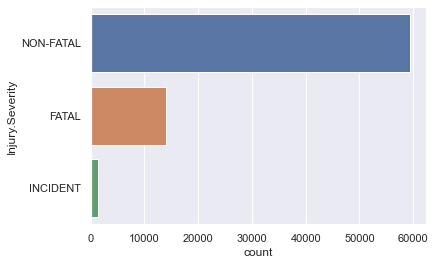

In [11]:
Injury = DataExplore['Injury.Severity']

#Replace unnecessary letters to fit conventional names
Injury = Injury.str.replace('\d+', '')
Injury = Injury.str.replace(')', '')
Injury = Injury.str.replace('(', '')

#Convert to category
InjuryCat = Injury.astype('category')

# Replacing 'Injury.Severity' column with cleaned data
DataExplore['Injury.Severity'] = Injury

# Remove 'Unavailable' in 'Injury.Severity' column
New_Injury = DataExplore[(DataExplore['Injury.Severity'] != 'UNAVAILABLE') ]
New_Injury = New_Injury['Injury.Severity'].astype('category')
DataExplore['Injury.Severity'] = New_Injury
DataExplore = DataExplore.dropna()

#Plot graph for Injury.Severity
sb.countplot(y = New_Injury, data=New_Injury, order = New_Injury.value_counts().index)

Comment: Majority of the Accident Reported are Non-Fatal

Data Type : <class 'pandas.core.frame.DataFrame'>
Data Dims 74849

SUBSTANTIAL    56739
DESTROYED      16049
MINOR           2061
Name: Aircraft.Damage, dtype: int64


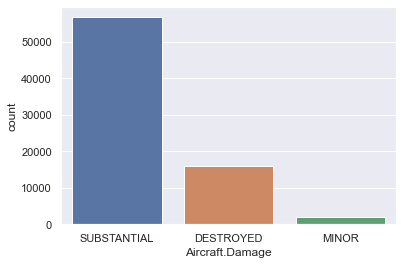

In [12]:
#Explore/Analyse Aircraft.Damage
Damage = pd.DataFrame(DataExplore['Aircraft.Damage'])
print('Data Type :', type(Damage))
print('Data Dims',Damage.size)
print()

# Summary Statistics for Aircraft.Damage
print(DataExplore["Aircraft.Damage"].value_counts())

#counting the frequency of damage sustained
sb.set_theme(style="darkgrid")
bx = sb.countplot(x="Aircraft.Damage", data=Damage)


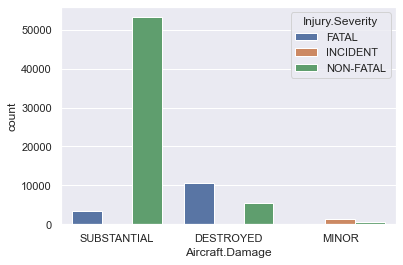

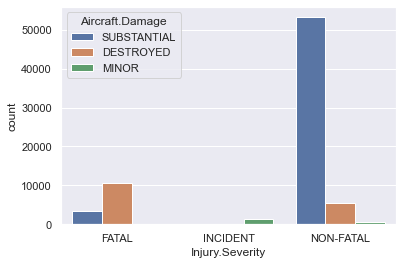

In [13]:
#Plotting Injury.Severity against Aircraft.damage
Plot1 = sb.countplot(x="Aircraft.Damage", hue="Injury.Severity",data = DataExplore)
plt.show()
#Plotting Injury.Severity against Aircraft.damage
Plot2 = sb.countplot(x="Injury.Severity", hue="Aircraft.Damage",data= DataExplore )
plt.show()

From the graph, it can be shown that Aircraft Damage does not have much of a correlation with the Injury Severity. When the Aircraft Damage is Substantial, it has the most non-fatal injuries. When the Aircraft Damage is destroyed, it has the highest amout of fatal injury.

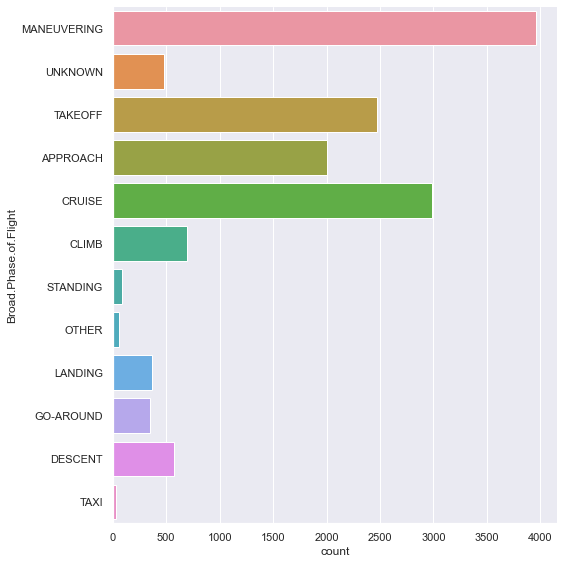

In [14]:
fatal = pd.DataFrame(DataExplore)
fatal=fatal[fatal['Investigation.Type'].isin(['ACCIDENT'])]
fatal=fatal[fatal['Injury.Severity'].isin(['FATAL'])]

sb.catplot(y='Broad.Phase.of.Flight',data=fatal,kind="count", height=8)
#check the highest 4 catplot counts

Top 4 fatal data can be seen in the data are Maneuvering, Takeoff, Cruise and Approach

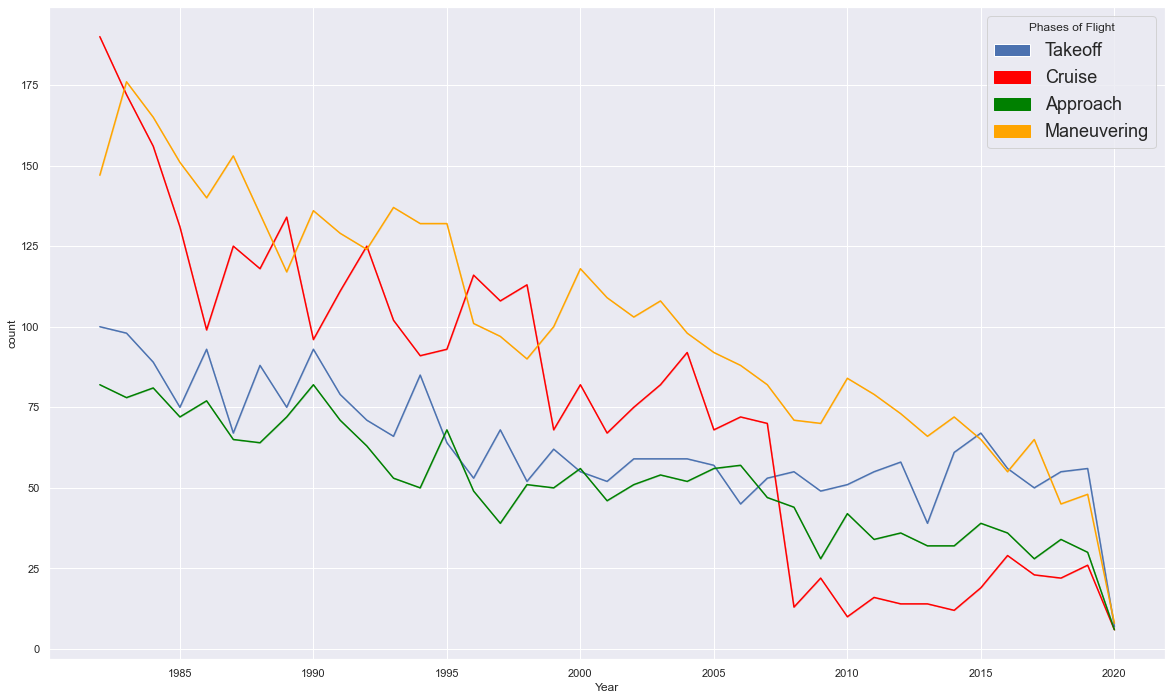

In [15]:
#get date
avidate_unclean = fatal[['Event.Date']]

# Split date into year,month,day
def f(df):
    dg = df.copy()
    dg['Year'] = pd.DatetimeIndex(df['Event.Date']).year
    dg['Month'] = pd.DatetimeIndex(df['Event.Date']).month
    dg['Day'] = pd.DatetimeIndex(df['Event.Date']).day
    return dg

avidate = f(avidate_unclean)

#Retrieve year 1982 onwards
Avidate1982 = avidate.loc[avidate['Year']>1981]

#Add count column to df
Avidate1982['count'] = Avidate1982.groupby('Year')['Year'].transform('count')

#Retrieve flight phases
phase_unclean = pd.DataFrame(fatal['Broad.Phase.of.Flight'])

#Concatenate flight phases to the dates
aviphase_unclean = pd.concat([Avidate1982 , phase_unclean],axis=1)

#Split data according to different flight phases
takeoff = aviphase_unclean.loc[aviphase_unclean['Broad.Phase.of.Flight']=='TAKEOFF']
cruise = aviphase_unclean.loc[aviphase_unclean['Broad.Phase.of.Flight']=='CRUISE']
maneuvering = aviphase_unclean.loc[(aviphase_unclean['Broad.Phase.of.Flight']=='MANEUVERING')]
approach = aviphase_unclean.loc[(aviphase_unclean['Broad.Phase.of.Flight']=='APPROACH')]

#Add count columns to the respective dfs
takeoff['count']=takeoff.groupby('Year')['Year'].transform('count')
cruise['count']=cruise.groupby('Year')['Year'].transform('count')
maneuvering['count']=maneuvering.groupby('Year')['Year'].transform('count')
approach['count']=approach.groupby('Year')['Year'].transform('count')

#Plot line graphs of all 3 phases of flight and their trend over the years
f,axes = plt.subplots(1,1,figsize = [20,12])
TakeOff = sb.lineplot('Year','count',data=takeoff,label = 'Takeoff')
Cruise = sb.lineplot('Year','count', color='red',data=cruise,label = 'Cruise')
Maneuvering = sb.lineplot('Year','count', color='orange',data=maneuvering,label = 'Maneuvering')
Approach = sb.lineplot('Year','count', color='green',data=approach,label = 'Approach')

import matplotlib.patches as mpatches #Obtained from matplotlib.org
takeoff_legend = mpatches.Patch(label='Takeoff')
cruise_legend = mpatches.Patch(color = 'red',label='Cruise')
approach_legend = mpatches.Patch(color = 'green',label='Approach')
maneuvering_legend = mpatches.Patch(color = 'orange',label='Maneuvering')

plt.legend(handles=[takeoff_legend,cruise_legend,approach_legend,maneuvering_legend],title = 'Phases of Flight',fontsize = 18)
plt.show()

[Text(0.5, 1.0, 'Cruise vs Yearly Accidents'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Cruise Accident Count')]

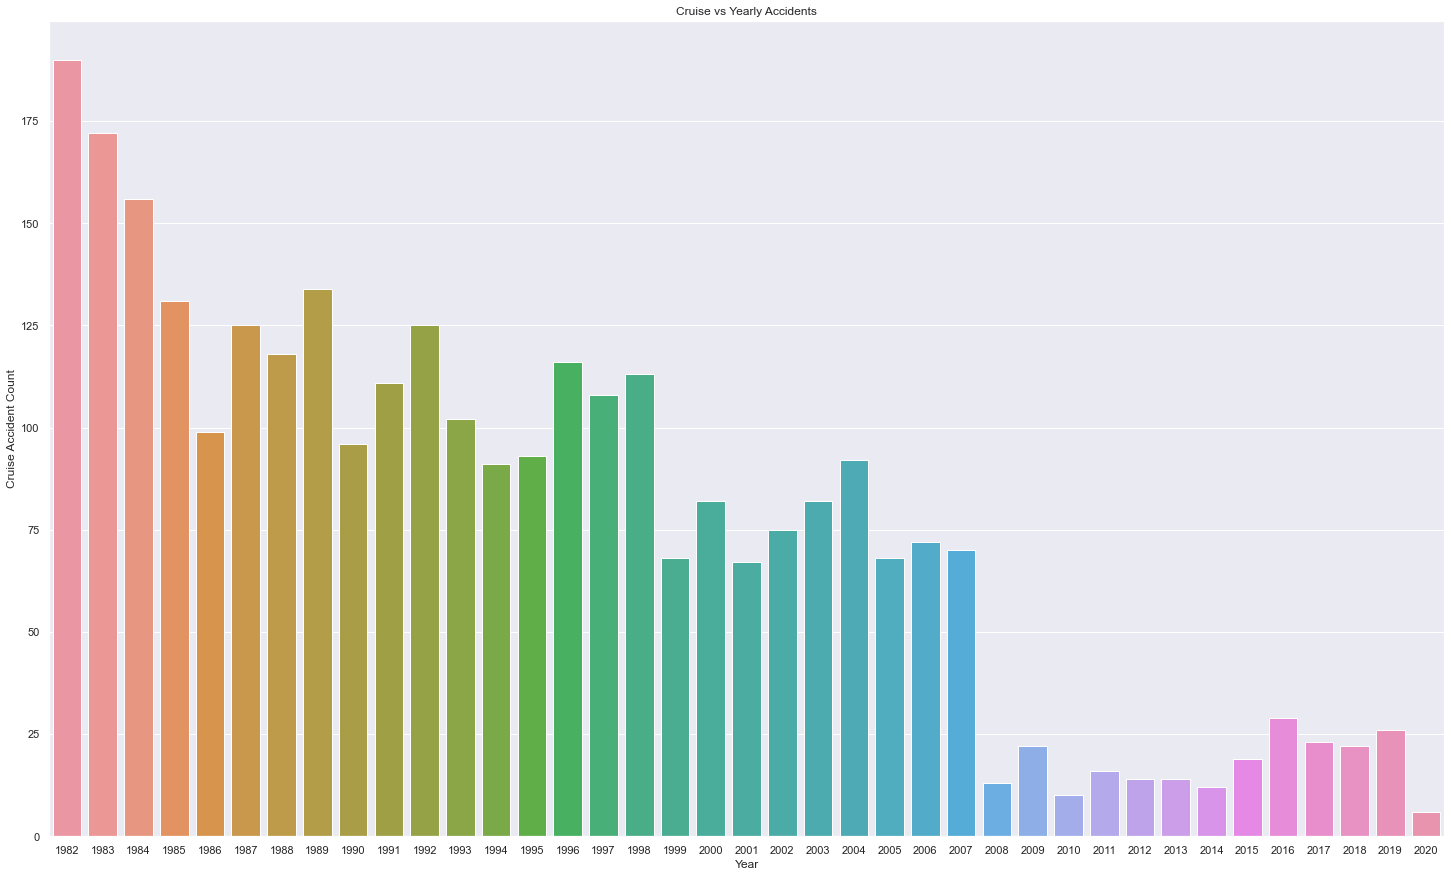

In [16]:
fatal['Year'] = pd.DatetimeIndex(fatal['Event.Date']).year #grouping all the data into years

#checking the numbers of accident per year
yearlyaccidents = pd.DataFrame(fatal['Year'].value_counts())
yearlyaccidents.sort_values(by=['Year'], ascending=False)

#grouping of the year to the flight only
phaseofflightdata = fatal[['Broad.Phase.of.Flight','Year']]
phaseofflightdata.drop(phaseofflightdata[(phaseofflightdata['Year'] == 1948) | (phaseofflightdata['Year'] == 1962) | (phaseofflightdata['Year'] == 1974) | (phaseofflightdata['Year'] == 1977) | (phaseofflightdata['Year'] == 1979) | (phaseofflightdata['Year'] == 1981)].index,inplace=True)  

#taking out individual phase of flight data
phaseofflightdata = phaseofflightdata.dropna()
cruiseflightdata = phaseofflightdata[(phaseofflightdata['Broad.Phase.of.Flight'] == 'CRUISE')]
cruiseflightdata = cruiseflightdata.groupby(["Broad.Phase.of.Flight", "Year"]).size().rename('count').reset_index()

plt.figure(figsize=(25, 15))
sb.barplot(x=cruiseflightdata['Year'],y=cruiseflightdata['count']).set(title = 'Cruise vs Yearly Accidents', xlabel ='Year', ylabel='Cruise Accident Count')

[Text(0.5, 1.0, 'TakeOff vs Yearly Accidents'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'TakeOff Accident Count')]

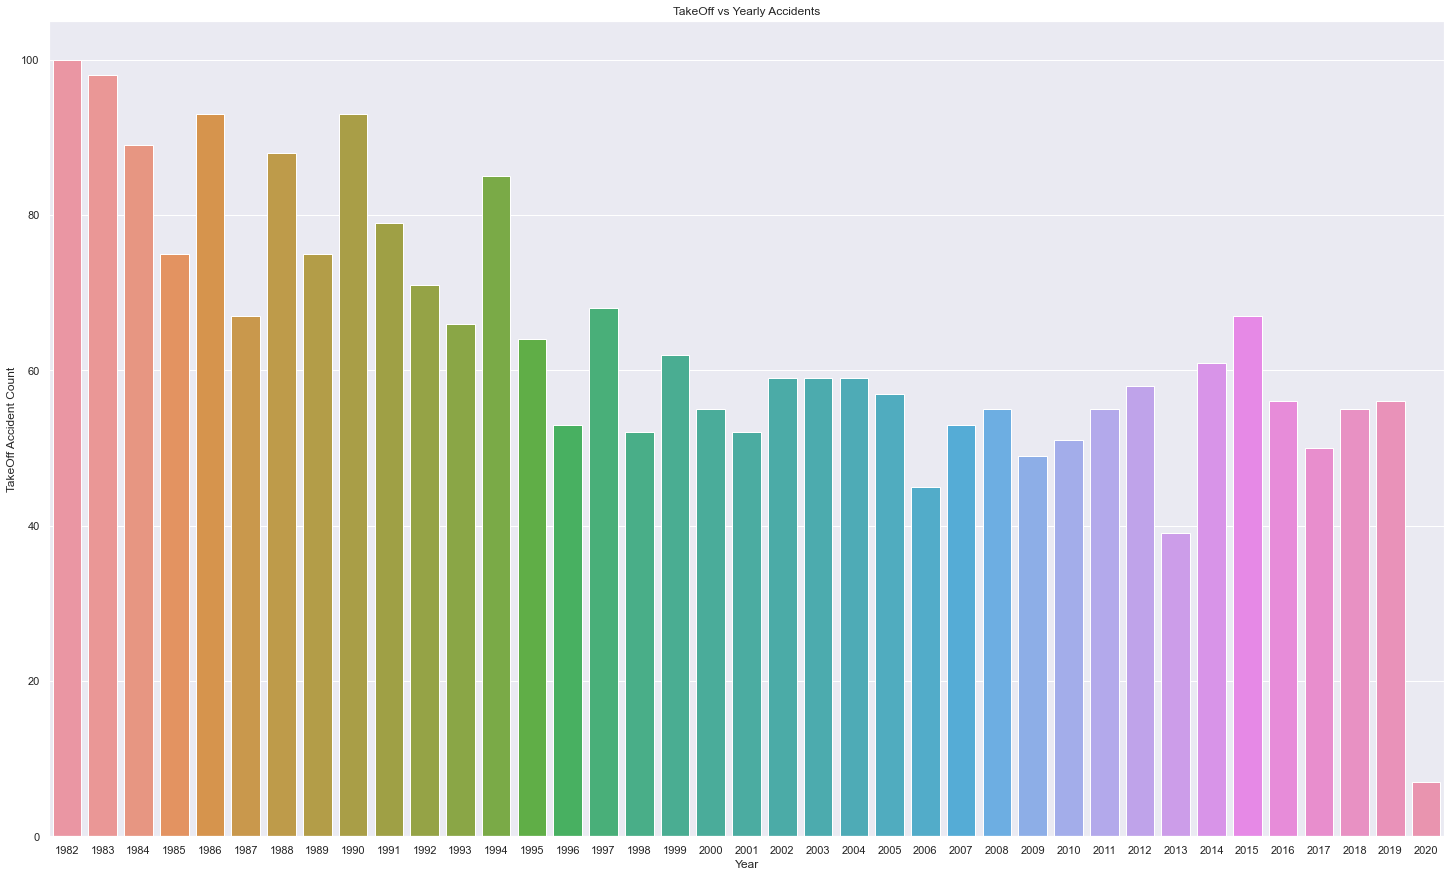

In [17]:
phaseofflightdata = phaseofflightdata.dropna()
takeoffflightdata = phaseofflightdata[(phaseofflightdata['Broad.Phase.of.Flight'] == 'TAKEOFF')]
takeoffflightdata = takeoffflightdata.groupby(["Broad.Phase.of.Flight", "Year"]).size().rename('count').reset_index()

plt.figure(figsize=(25, 15))
sb.barplot(x=takeoffflightdata['Year'],y=takeoffflightdata['count']).set(title = 'TakeOff vs Yearly Accidents', xlabel ='Year', ylabel='TakeOff Accident Count')

[Text(0.5, 1.0, 'Approach vs Yearly Accidents'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Approach Accident Count')]

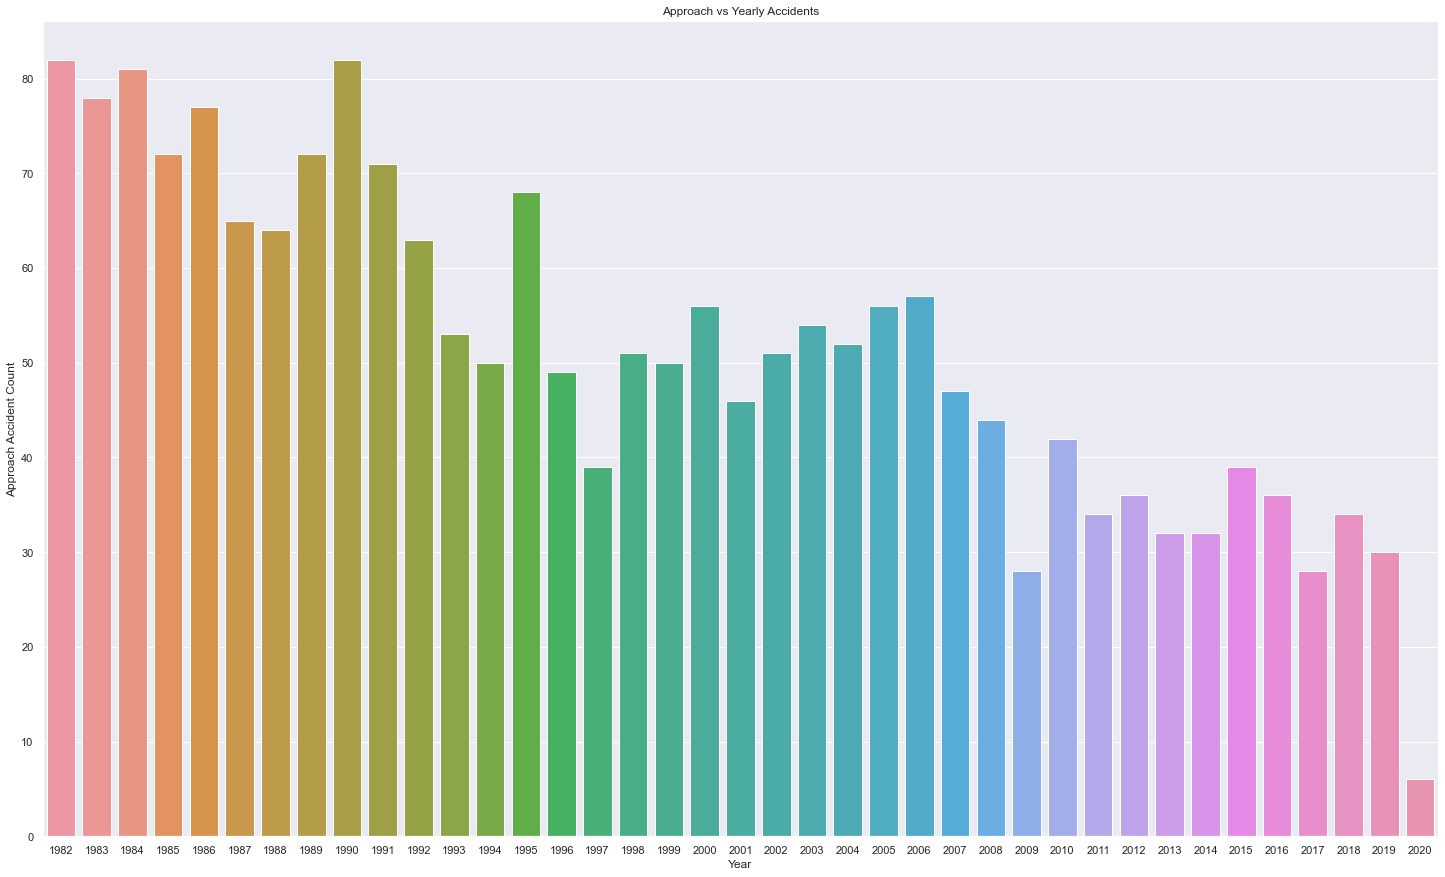

In [18]:
phaseofflightdata = phaseofflightdata.dropna()
approachflightdata = phaseofflightdata[(phaseofflightdata['Broad.Phase.of.Flight'] == 'APPROACH')]
approachflightdata = approachflightdata.groupby(["Broad.Phase.of.Flight", "Year"]).size().rename('count').reset_index()

plt.figure(figsize=(25, 15))
sb.barplot(x=approachflightdata['Year'],y=approachflightdata['count']).set(title = 'Approach vs Yearly Accidents', xlabel ='Year', ylabel='Approach Accident Count')

[Text(0.5, 1.0, 'Maneuver vs Yearly Accidents'),
 Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'Maneuver Accident Count')]

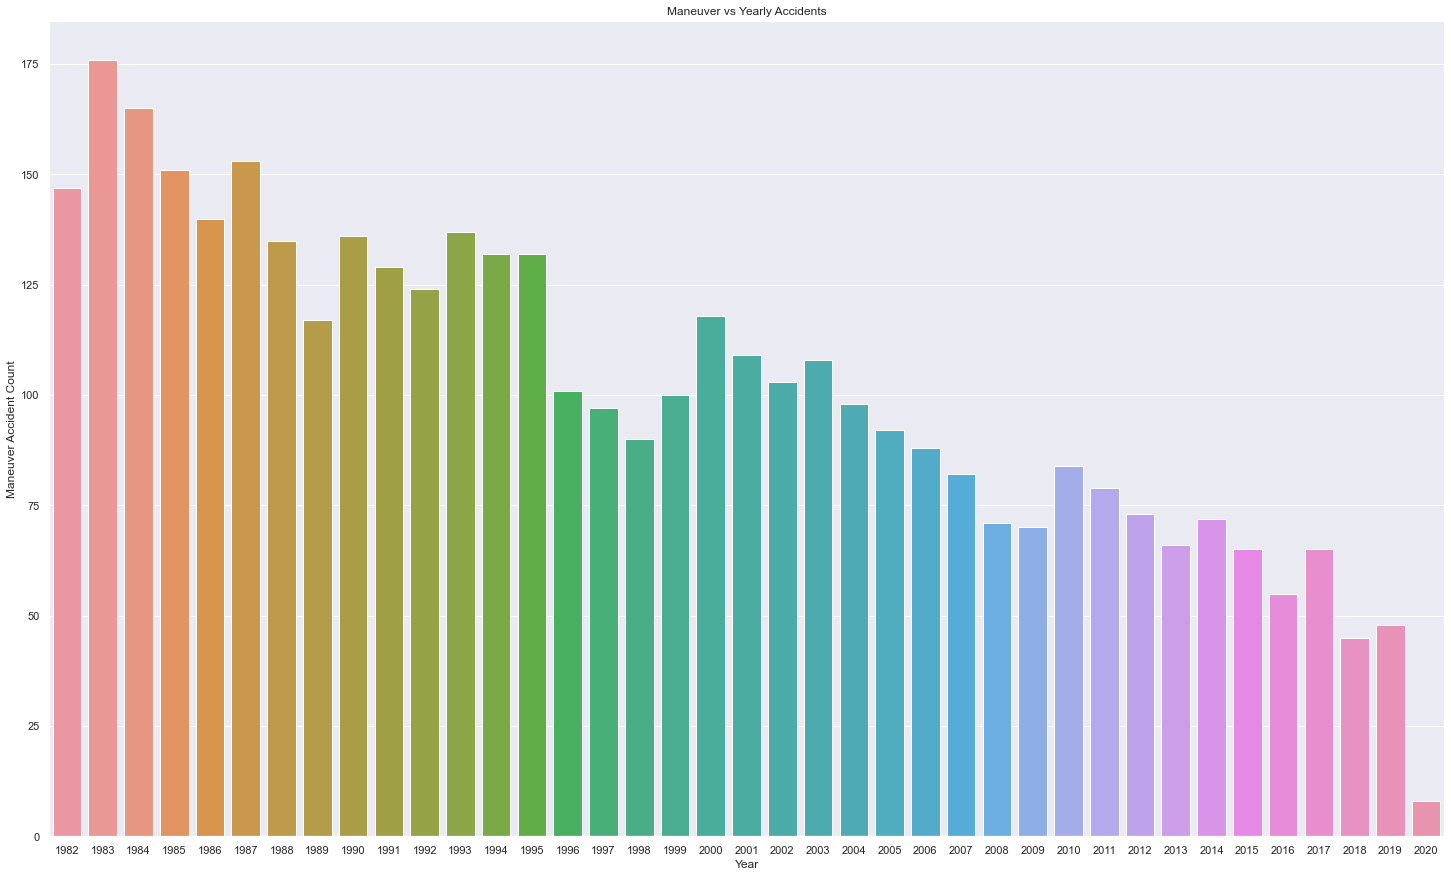

In [19]:
phaseofflightdata = phaseofflightdata.dropna()
maneuverflightdata = phaseofflightdata[(phaseofflightdata['Broad.Phase.of.Flight'] == 'MANEUVERING')]
maneuverflightdata = maneuverflightdata.groupby(["Broad.Phase.of.Flight", "Year"]).size().rename('count').reset_index()

plt.figure(figsize=(25, 15))
sb.barplot(x=maneuverflightdata['Year'],y=maneuverflightdata['count']).set(title = 'Maneuver vs Yearly Accidents', xlabel ='Year', ylabel='Maneuver Accident Count')